In [1]:
import csv

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
import numpy as np

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [2]:
vocab_size = 1000
embed_dim = 16
max_len = 120
trunc_type = 'post'
pad_type = 'pre'
oov_tok = '<OOV>'
train_percentage = 0.8


In [3]:
sentences   = []
labels      = []

bbcfile = "C:/VIN_PYCHARM/ONE/DATA/bbc-text.csv"

with open(bbcfile, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)


In [4]:
training_size = int(train_percentage * len(sentences))

training_sentences = sentences[0:training_size]
training_label     = labels[0:training_size]

test_sentences  = sentences[training_size:]
test_labels     = labels [training_size:]



tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
padded_train = pad_sequences(training_sequences,maxlen=max_len, padding = pad_type, truncating=trunc_type)

testing_sequence = tokenizer.texts_to_sequences(test_sentences)
padded_test     = pad_sequences(testing_sequence,maxlen=max_len, padding = pad_type, truncating=trunc_type)


In [10]:
print(len(training_sequences[0]))
print(len(padded_train[0]))

print(len(training_sequences[1]))
print(len(padded_train[1]))

print(len(training_sequences[10]))
print(len(padded_train[10]))


print(len(testing_sequence))
print(padded_test.shape)

449
120
200
120
192
120
445
(445, 120)


In [29]:
lbltokenizer = Tokenizer()
lbltokenizer.fit_on_texts(training_label)
lblword_index = lbltokenizer.word_index

training_label_sequence = lbltokenizer.texts_to_sequences(training_label)
training_label_sequence = np.array(training_label_sequence)

testing_label_sequence  = lbltokenizer.texts_to_sequences(test_labels)
testing_label_sequence = np.array(testing_label_sequence)

print (lblword_index)

{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}


In [8]:

print(training_label_sequence[0])
print(training_label_sequence[1])
print(training_label_sequence[2])
print(training_label_sequence.shape)

print(testing_label_sequence[0])
print(testing_label_sequence[1])
print(testing_label_sequence[2])
print(testing_label_sequence.shape)

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_len))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(24,activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [15]:
num_epochs = 30

history = model.fit(padded_train, training_label_sequence,epochs=num_epochs, validation_data=(padded_test,testing_label_sequence) )

Epoch 1/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.1938 - val_accuracy: 0.9371
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 0.9326
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9348
Epoch 4/30
56/56 [==============================] - 0s 3ms/ste

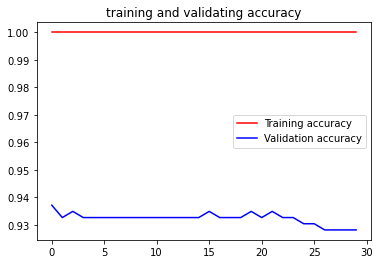

<Figure size 432x288 with 0 Axes>

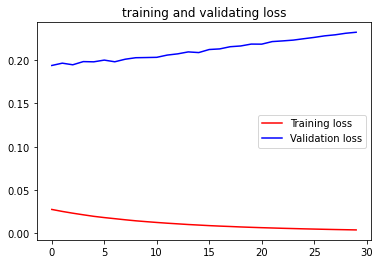

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('training and validating accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validating loss')
plt.legend(loc=0)

In [17]:
layer = model.layers[0]
weights = layer.get_weights()[0]
print(weights.shape)

(1000, 16)


In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [25]:
import io

out_v = io.open('C:/VIN_PYCHARM/ONE/Data/bbc_vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('C:/VIN_PYCHARM/ONE/Data/bbc_meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


In [34]:
def IndexOfMax(a):
    arr = np.array(a)
    result = np.where(arr == np.amax(arr))
    return result[0][0]

In [37]:
reverse_lbl_word_index = dict([(value, key) for (key, value) in lblword_index.items()])


In [36]:
sentence = ["Arsenal manager Mikel Arteta outmanoeuvred his mentor Pep Guardiola as the Gunners reached the FA Cup final with victory at Wembley"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_len, padding=pad_type, truncating=trunc_type)
classifications = model.predict(padded)

index = IndexOfMax(classifications[0])

print(reverse_lbl_word_index[index])


sport
